In [251]:
import pandas as pd
import collections
import skbio 
from skbio.diversity.alpha import shannon 
import IPython
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
vdjdb_data = pd.read_csv("vdjdb_data.csv")

In [253]:
del vdjdb_data ['Unnamed: 0']
vdjdb_data = vdjdb_data[sorted(vdjdb_data.columns)]
vdjdb_data.head()

,CDR3,Epitope,Gene,J,V
0,CAVGNNAGNMLTF,NEGVKAAW,TRA,TRAJ39*01,TRAV20*01
1,CAAKTGGGNKLTF,NEGVKAAW,TRA,TRAJ10*01,TRAV29/DV5*01
2,CAAKAGGGNKLTF,NEGVKAAW,TRA,TRAJ10*01,TRAV29/DV5*01
3,CAAITGIGGSQGNLIF,NEGVKAAW,TRA,TRAJ42*01,TRAV13-1*01
4,CAGTDGGATNKLIF,NEGVKAAW,TRA,TRAJ32*01,TRAV36/DV7*01


In [254]:
TRAJ = vdjdb_data ['J'].unique()
TRAV = vdjdb_data ['V'].unique()

In [255]:
print (TRAJ) # via deze methode gekeken hoe de data eruitzag om te splitsen

['TRAJ39*01' 'TRAJ10*01' 'TRAJ42*01' 'TRAJ32*01' 'TRAJ13*01' 'TRAJ8*01'
 'TRAJ47*01' 'TRAJ29*01' 'TRAJ17*01' 'TRAJ38*01' 'TRAJ44*01' 'TRAJ49*01'
 'TRAJ26*01' 'TRAJ34*01' 'TRAJ40*01' 'TRAJ33*01' 'TRAJ23*01' 'TRAJ57*01'
 'TRAJ43*01' 'TRAJ6*01' 'TRAJ20*01' 'TRAJ30*01' 'TRAJ48*01' 'TRAJ31*01'
 'TRAJ45*01' 'TRAJ3*01' 'TRAJ27*01' 'TRAJ36*01' 'TRAJ52*01' 'TRAJ15*01'
 'TRAJ5*01' 'TRAJ4*01' 'TRAJ50*01' 'TRAJ28*01' 'TRAJ53*01' 'TRAJ37*01'
 'TRAJ22*01' 'TRAJ41*01' 'TRAJ9*01' 'TRAJ12*01' 'TRAJ11*01' 'TRAJ46*01'
 'TRAJ54*01' 'TRAJ18*01' 'TRAJ21*01' 'TRAJ56*01' 'TRAJ7*01' 'TRAJ14*01'
 'TRAJ13*02' 'TRAJ24*02']


In [256]:
print (TRAV) 

['TRAV20*01' 'TRAV29/DV5*01' 'TRAV13-1*01' 'TRAV36/DV7*01' 'TRAV19*01'
 'TRAV8-2*01' 'TRAV27*01' 'TRAV8-6*01' 'TRAV35*01' 'TRAV9-2*01'
 'TRAV23/DV6*01' 'TRAV38-2/DV8*01' 'TRAV18*01' 'TRAV8-3*01' 'TRAV22*01'
 'TRAV13-2*01' 'TRAV21*01' 'TRAV8-4*01' 'TRAV5*01' 'TRAV12-2*01'
 'TRAV38-1*01' 'TRAV12-1*01' 'TRAV1-2*01' 'TRAV39*01' 'TRAV16*01'
 'TRAV17*01' 'TRAV10*01' 'TRAV24*01' 'TRAV41*01' 'TRAV12-3*01' 'TRAV3*01'
 'TRAV8-1*01' 'TRAV26-2*01' 'TRAV4*01' 'TRAV14/DV4*01' 'TRAV2*01'
 'TRAV30*01' 'TRAV25*01' 'TRAV26-1*01' 'TRAV1-1*01' 'TRAV34*01'
 'TRAV40*01' 'TRAV6*01' 'TRAV9-1*01' 'TRAV7*01' 'TRAV14/DV4*02'
 'TRAV8-6*02']


In [257]:
vdjdb_data.replace('TRAJ','',regex=True, inplace = True)
vdjdb_data[['J_family','J_allele']] = vdjdb_data.J.str.split ("*",expand=True)
del vdjdb_data ['J']
# add a leading 0 to all families with only one digit
vdjdb_data['J_family'] = vdjdb_data['J_family'].str.zfill(2)
vdjdb_data.head()

,CDR3,Epitope,Gene,V,J_family,J_allele
0,CAVGNNAGNMLTF,NEGVKAAW,TRA,TRAV20*01,39,01
1,CAAKTGGGNKLTF,NEGVKAAW,TRA,TRAV29/DV5*01,10,01
2,CAAKAGGGNKLTF,NEGVKAAW,TRA,TRAV29/DV5*01,10,01
3,CAAITGIGGSQGNLIF,NEGVKAAW,TRA,TRAV13-1*01,42,01
4,CAGTDGGATNKLIF,NEGVKAAW,TRA,TRAV36/DV7*01,32,01


In [258]:
vdjdb_data.replace('TRAV','',regex=True, inplace = True)
vdjdb_data[['V','V_allele']] = vdjdb_data.V.str.split ("*",expand=True) # eerst allele afsplitsen, komt na de *
# dan in 3 stappen de gene van de family scheiden
vdjdb_data[['V_family','V_gene_1']] = vdjdb_data.V.str.split ("-",expand=True) # eerst scheiden op -
vdjdb_data[['V_family','V_gene_2']] = vdjdb_data.V_family.str.split ("/",expand=True) # dan op /
vdjdb_data.replace(np.nan,'', regex=True )
# ten slotte de 2 gene kolommen nog mergen en de andere 2 verwijderen
vdjdb_data = vdjdb_data.assign(V_gene = vdjdb_data.V_gene_1.astype(str) + vdjdb_data.V_gene_2.astype(str))

In [259]:
vdjdb_data.replace('nan','',regex=True, inplace = True)

In [260]:
del vdjdb_data ['V']
del vdjdb_data ['V_gene_1']
del vdjdb_data ['V_gene_2']

In [261]:
# add a leading 0 to all Values with only one digit
vdjdb_data['V_family'] = vdjdb_data['V_family'].str.zfill(2)
vdjdb_data['V_gene'] = vdjdb_data['V_gene'].str.zfill(2)

In [262]:
vdjdb_data = vdjdb_data[sorted(vdjdb_data.columns)]
vdjdb_data.head()
# nog vragen: als er geen V_gene is gegeven, moet dit dan aangevuld worden tot 00 of gewoon leeggelaten worden?

,CDR3,Epitope,Gene,J_allele,J_family,V_allele,V_family,V_gene
0,CAVGNNAGNMLTF,NEGVKAAW,TRA,01,39,01,20,00
1,CAAKTGGGNKLTF,NEGVKAAW,TRA,01,10,01,29,DV5
2,CAAKAGGGNKLTF,NEGVKAAW,TRA,01,10,01,29,DV5
3,CAAITGIGGSQGNLIF,NEGVKAAW,TRA,01,42,01,13,01
4,CAGTDGGATNKLIF,NEGVKAAW,TRA,01,32,01,36,DV7


In [263]:
vdjdb_pos = vdjdb_data.groupby('Epitope').filter(lambda x: len(x)> 30) # dit zal ik nog moeten aanpassen want moet naar unieke kijken niet naar totaal denk ik

In [264]:
## Data exploration (gekopieerd uit de code van de paper)
classes = vdjdb_pos['Epitope'].unique()
stats = collections.defaultdict(list)
for peptide in classes:
    pep_data = vdjdb_pos[vdjdb_pos['Epitope'] == peptide]
    
    stats['total TCRAs'].append(pep_data.shape[0])
    stats['unique CDR3'].append(len(set(pep_data['CDR3'])))
    
    cdr3_count = list(collections.Counter(pep_data['CDR3']).values())
    stats['CDR3 diversity'].append(shannon(cdr3_count))
    
    stats['unique V family'].append(len(pep_data['V_family'].unique()))
    stats['unique J family'].append(len(pep_data['J_family'].unique()))
    stats['unique V gene'].append(len(pep_data['V_gene'].unique()))
    stats['unique J allele'].append(len(pep_data['J_allele'].unique()))
    stats['unique V allele'].append(len(pep_data['V_allele'].unique()))
    v_fam_count = list(collections.Counter(pep_data['V_family']).values())
    j_fam_count = list(collections.Counter(pep_data['J_family']).values())
    v_gene_count = list(collections.Counter(pep_data['V_gene']).values())
    j_allele_count = list(collections.Counter(pep_data['J_allele']).values())
    v_allele_count = list(collections.Counter(pep_data['V_allele']).values())
    stats['V family diversity'].append(shannon(v_fam_count))
    stats['J family diversity'].append(shannon(j_fam_count))
    stats['V gene diversity'].append(shannon(v_gene_count))
    stats['J allele diversity'].append(shannon(j_allele_count))
    stats['V allele diversity'].append(shannon(v_allele_count))

pd.set_option('display.max_columns', None)
IPython.display.display(pd.DataFrame(stats, index=classes, columns=stats.keys()).T)
# Unique J en V allele zeggen hier niet zo veel omdat deze bijna altijd alleen 01 of 02 zijn

,NEGVKAAW,KLGGALQAK,ELAGIGILTV,IVTDFSVIK,AVFDRKSDAK,RAKFKQLL,GILGFVFTL,SLFNTVATLY,RLRAEAQVK,AYAQKIFKI,GLCTLVAML,LLFGYPVYV,FLYALALLL,FLASKIGRLV,RTLNAWVKV,FLRGRAYGL,NLVPMVATV,CINGVCWTV,LLWNGPMAV,KLVALGINAV,DPFRLLQNSQVFS,GLIYNRMGAVTTEV,PKYVKQNTLKLAT,QARQMVQAMRTIGTHP,SGPLKAEIAQRLED,GMFNMLSTVLGVS,FRDYVDRFYKTLRAEQASQE,LLLGIGILV,KAFSPEVIPMF,DATYQRTRALVR,YLQPRTFLL
total TCRAs,301.000000,13401.000000,361.000000,710.000000,1687.000000,1213.000000,4472.000000,37.000000,413.000000,39.000000,311.000000,32.000000,38.000000,31.000000,44.000000,41.000000,2212.000000,74.000000,299.000000,46.000000,43.000000,128.000000,141.000000,111.000000,63.000000,72.000000,248.000000,376.000000,31.000000,112.000000,325.000000
unique CDR3,118.000000,11426.000000,332.000000,519.000000,1534.000000,642.000000,3004.000000,37.000000,390.000000,39.000000,190.000000,32.000000,22.000000,31.000000,44.000000,29.000000,2093.000000,71.000000,247.000000,45.000000,42.000000,119.000000,139.000000,102.000000,62.000000,65.000000,141.000000,345.000000,22.000000,88.000000,262.000000
CDR3 diversity,6.159650,13.212909,8.318918,8.044908,10.433803,8.097860,10.818358,5.209453,8.563207,5.285402,6.908826,5.000000,3.812945,4.954196,5.459432,4.448181,10.948642,6.128372,7.743769,5.480084,5.379753,6.859375,7.111183,6.542164,5.945534,5.975481,6.660757,8.380361,4.324849,6.322849,7.817597
unique V family,26.000000,33.000000,24.000000,31.000000,32.000000,33.000000,33.000000,16.000000,32.000000,18.000000,25.000000,13.000000,11.000000,14.000000,25.000000,15.000000,33.000000,11.000000,28.000000,10.000000,17.000000,23.000000,27.000000,18.000000,17.000000,17.000000,10.000000,27.000000,7.000000,20.000000,23.000000
unique J family,38.000000,48.000000,46.000000,46.000000,47.000000,46.000000,48.000000,25.000000,46.000000,24.000000,43.000000,25.000000,11.000000,25.000000,27.000000,22.000000,46.000000,34.000000,44.000000,25.000000,22.000000,37.000000,42.000000,31.000000,31.000000,34.000000,27.000000,43.000000,9.000000,35.000000,37.000000
unique V gene,10.000000,11.000000,9.000000,11.000000,11.000000,11.000000,11.000000,8.000000,11.000000,8.000000,10.000000,8.000000,5.000000,7.000000,10.000000,7.000000,11.000000,8.000000,10.000000,7.000000,7.000000,10.000000,10.000000,9.000000,6.000000,8.000000,3.000000,11.000000,6.000000,7.000000,8.000000
unique J allele,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
unique V allele,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
V family diversity,3.832061,4.471825,1.239394,4.247684,4.420575,3.745162,4.119155,3.677804,4.478998,3.759511,3.014938,3.237301,2.034864,3.619226,4.388536,3.389675,4.576203,2.495234,2.271051,1.864106,3.631444,3.540532,4.075117,2.856583,2.830259,3.308998,1.011571,2.641717,2.137972,3.478539,1.219611
J family diversity,4.477435,5.390525,5.013560,5.007671,5.392408,4.711714,4.246334,4.465946,5.320349,4.355539,4.594717,4.515320,1.926574,4.518397,4.600922,4.051482,5.384800,4.762461,4.615085,4.246282,4.166246,4.827183,5.110287,4.383797,4.677688,4.657510,3.357188,4.834619,2.382494,4.711158,3.825526


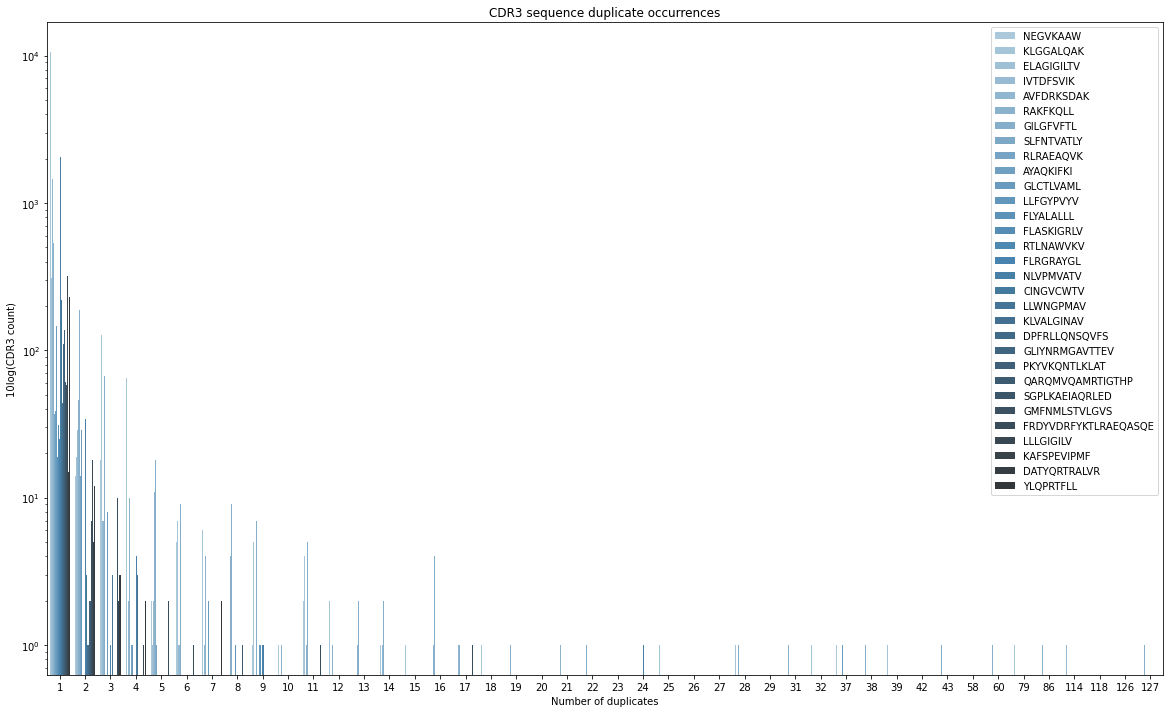

In [266]:
# plot the number of duplicates per CDR3 sequence
counts = []
for peptide in classes: # classes zijn alle unieke epitopen
    count = vdjdb_data[vdjdb_data['Epitope'] == peptide]['CDR3'].value_counts() # values_counts() zal de unieke waarden tellen
    counts.append(pd.DataFrame({'counts': count, 'peptide': [peptide] * len(count)}))

# opmaak van de plot
plt.figure(figsize=(20, 12))

sns.countplot(x='counts', hue='peptide', data=pd.concat(counts), palette='Blues_d')

plt.yscale('log')


plt.title('CDR3 sequence duplicate occurrences')

plt.xlabel('Number of duplicates')
plt.ylabel('10log(CDR3 count)')

plt.legend(loc='upper right', frameon=True)

#plt.savefig('CDR3sequence_distribution.pdf', bbox_inches='tight', dpi=600)
plt.show()
plt.close()

In [267]:
# show V_gene and J_gene usage at family level (is dit ook relevant hier? door vele epitopen zal er waarschijnlijk niet zo veel op duidelijk worden)

In [268]:
## Zelfde voor de data van McPAS
McPAS_data = pd.read_csv("McPAS_data.csv")

In [269]:
del McPAS_data['Unnamed: 0']
McPAS_data.head()

,CDR3,Species,Epitope gene,Epitope,MHC A,V,J,Gene
0,CAVTIGFGNVLHCGSGTQVIVLPHIQ,Human,Melan-A/MART-1,EAAGIGILTV,HLA-A*02,TRAV2,TRAJ35,TRA
1,CASGGGADGLTFPYIQF,Human,Melan-A/MART-1,EAAGIGILTV,HLA-A*02,TRAV2,TRAJ45,TRA
2,CAASPPESGGYNKLIF,Human,Melan-A/MART-1,EAAGIGILTV,HLA-A*02,TRAV21,TRAJ4,TRA
3,CAAYYGGSOGNLIF,Human,Melan-A/MART-1,EAAGIGILTV,HLA-A*02,TRAV21,TRAJ42,TRA
4,CAVSRGGGADGLTF,Human,Melan-A/MART-1,EAAGIGILTV,HLA-A*02,TRAV2,TRAJ45,TRA


In [270]:
McPAS_pos = McPAS_data.groupby('Epitope').filter(lambda x: len(x)> 30)

In [271]:
Epitopes = McPAS_pos ['Epitope'].unique()
print (Epitopes) # enkel RPRGEVRFL, KMVAVFYTT, VVLSWAPPV en NLNCCSVPV komen nog niet in vdjdb voor de rest wel

['GLCTLVAML' 'NLVPMVATV' 'KAFSPEVIPMF' 'RPRGEVRFL' 'GILGFVFTL' 'LLWNGPMAV'
 'ELAGIGILTV' 'RFYKTLRAEQASQ' 'KLVALGINAV' 'KMVAVFYTT' 'VVLSWAPPV'
 'NLNCCSVPV']


In [272]:
TRAJ = McPAS_data ['J'].unique()
print (TRAJ) # gebruikt niet de standaard naamgeving


['TRAJ35' 'TRAJ45' 'TRAJ4' 'TRAJ42' 'TRAJ47' 'TRAJ9' 'TRAJ39' 'TRAJ48'
 'TRAJ1' 'TRAJ5-1' 'TRAJ15' nan 'TRAJ2' 'TRAJ5' 'TRAJ49' 'TRAJ54' 'TRAJ21'
 'TRAJ53' 'TRAJ40' 'TRAJ36' 'TRAJ38' 'TRAJ26' 'TRAJ3' 'TRAJ37' 'TRAJ11'
 'TRAJ31' 'TRAJ34' 'TRAJ23' 'TRAJ16' 'TRAJ1-3' 'TRAJ9-1' 'TRAJ16-5'
 'TRAJ1-8' 'TRAJ10-1' 'TRAJ3-2' 'TRAJ9-14' 'TRAJ14-1' 'TRAJ16-1' 'TRAJ33'
 'TRAJ52' 'TRAJ44' 'TRAJ43' 'TRAJ50' 'TRAJ20' 'TRAJ58' 'TRAJ6' 'TRAJ57'
 'TRAJ8' 'TRAJ13' 'TRAJ29' 'TRAJ27' 'TRAJ30' 'TRAJ32' 'TRAJ10' 'TRAJ24'
 'TRAJ7' 'TRAJ28' 'TRAJ56' 'TRAJ37-2' 'TRAJ41' 'TRAJ17' 'TRAJ22' 'TRAJ12'
 'TRAJ4-01' 'TRAJ5-01' 'TRAJ3-01' 'TRAJ1-01' 'TRAJ24:02' 'TRAJ2-01'
 'TRAJ9-01' 'TRAJ6-01' 'TRAJ8-01' 'TRAJ13:02' 'TRAJ49:01' 'TRAJ20:01'
 'TRAJ42:01' 'TRAJ24:01' 'TRAJ21:01' 'TRAJ7:01' 'TRAJ39:01' 'TRAJ36:01'
 'TRAJ54:01' 'TRAJ16:01' 'TRAJ58:01' 'TRAJ18' 'TRAJ53:01' 'TRAJ53:02'
 'TRAJ53:05' 'TRAJ43:01' 'TRAJ2-1' 'TRAJ41:01' 'TRAJ3-1' 'TRAJ34:01'
 'TRAJ31:01' 'TRAJ44:01' 'TRAJ38:01' 'TRAJ17:01' 'TRAJ48:01' 'TRAJ9:01'
 